<a href="https://colab.research.google.com/github/CervantesMCinthiaK/Metodos-Numericos/blob/main/Polinomio%20Interpolante%20de%20Lagrange%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Interpolante de Lagrange con Sympy
Cervantes Martinez Cinthia Karina


In [39]:
#Definimos las biliotecas que usaremos
import sympy as sp
import matplotlib.pyplot as plt

In [40]:
# Definimos la funcion para calcular el polinomio de interpolacion de Lagrange
def lagrange_interpolation(x_vals, f_vals):
    # Crear el simbolo para el polinomio
    x = sp.symbols('x')
    n = len(x_vals)

    # Inicializamos el polinomio de Lagrange
    P = 0

    # Construimos el polinomio Lagrange como la suma de los terminos L_i(x) * f(x_i)
    for i in range(n):
        # Se crea el polinomio L_i(x)
        L_i = 1
        for j in range(n):
            if j != i:
                L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

        # Suma el termino f(x_i) * L_i(x) al polinomio total
        P += f_vals[i] * L_i

    # Simplificamos el polinomio
    P_simplified = sp.simplify(P)

   # Redondeamos el polinomio a 3 decimales usando evalf()
    P_rounded = P_simplified.evalf(3)

    return P_rounded

In [41]:
# Definimos la funcion para graficar el polinomio de Lagrange junto con los datos originales
def graficar_lagrange(x_vals, f_vals, polinomio_func):
    # Crea una malla de x para graficar el polinomio
    x_min = min(x_vals) - 1  # Un poco mas alla del valor minimo de x
    x_max = max(x_vals) + 1  # Un poco mas alla del valor maximo de x

    x_vals_denso = [i / 100 for i in range(int(x_min * 100), int(x_max * 100))]
    y_vals_denso = [polinomio_func(x) for x in x_vals_denso]

    # Grafica los puntos de la tabla (x_i, f(x_i))
    plt.scatter(x_vals, f_vals, color="red", label="Datos Originales (x, f(x))", zorder=5)

    # Grafica el polinomio de Lagrange en color azul
    plt.plot(x_vals_denso, y_vals_denso, color="blue", label="Polinomio Interpolante de Lagrange")

    # Añadimos los valores de cada punto (x_i, f(x_i)) en la grafica
    for i, (x, y) in enumerate(zip(x_vals, f_vals)):
        # Colocamos el texto cerca de cada punto
        plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=9, ha="right", color="black")

    # Configuramos el titulo, etiquetas y leyenda
    plt.xlabel("x", fontsize=8, color="gray")
    plt.ylabel("f(x)", fontsize=8, color="gray")
    plt.axhline(0, color="gray")
    plt.axvline(0, color="gray")
    plt.grid(True)
    plt.legend()
    plt.savefig("output.png") # Guardar grafico como imagen PNG
    plt.show()

¿Cuantos puntos de datos tienes en la tabla? 3
Ingrese el valor de x_1: 1
Ingrese el valor de f(x_1): 0.52
Ingrese el valor de x_2: 2
Ingrese el valor de f(x_2): 0.61
Ingrese el valor de x_3: 3
Ingrese el valor de f(x_3): 0.47

El polinomio de interpolación de Lagrange es:
-0.115*x**2 + 0.435*x + 0.2


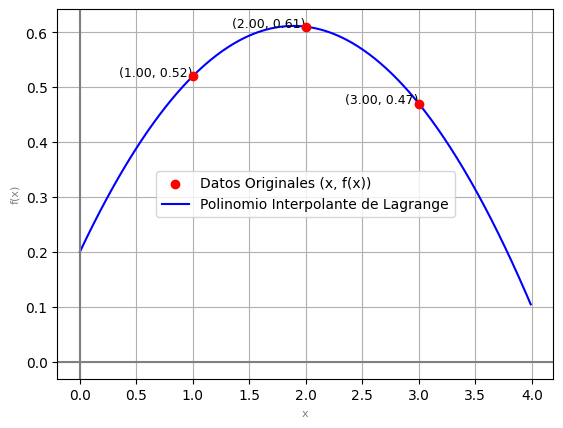

In [42]:
#La funcion para guardar los valores a usar
def main():
    # Solicitamos al usuario los puntos (x_i, f(x_i))
    n = int(input("¿Cuantos puntos de datos tienes en la tabla? "))
    x_vals = []
    f_vals = []

    for i in range(n):
        x_i = float(input(f"Ingrese el valor de x_{i+1}: "))
        f_i = float(input(f"Ingrese el valor de f(x_{i+1}): "))
        x_vals.append(x_i)
        f_vals.append(f_i)

    # Calculamos el polinomio de Lagrange
    polinomio = lagrange_interpolation(x_vals, f_vals)

    # Mostramos el polinomio
    print("\nEl polinomio de interpolación de Lagrange es:")
    print(polinomio)

    # Grafica el polinomio junto con los puntos de la tabla original
    graficar_lagrange(x_vals, f_vals, lambda x_val: polinomio.evalf(subs={sp.symbols('x'): x_val}))

# Ejecutamos el programa
if __name__ == "__main__":
    main()


En este codigo ahora ingresamos la tabla de valores y nos da el polinomio junto con su grafica :
$$
\begin{array}{|c|c|}
\hline
x & f(x) \\
\hline
1 & 0.52 \\
2 & 0.61 \\
3 & 0.47 \\
4 & 0.30 \\
\hline
\end{array}
$$


Con $$
x_0=1 , x_1=2 , x_3=3$$

